In [1]:
from TIRE import DenseTIRE as TIRE
import torch
import numpy as np
import matplotlib.pyplot as plt
from TIRE import utils
from scipy import integrate
from scipy.fft import fft
import TIRE.simulate as simulate
from scipy.stats import entropy
from scipy.stats import variation
import pandas as pd
import csv
import sys

In [2]:
window_size = 10
input_dim = 7 # single tick dimension. 1 for univariate

In [3]:
txtfile_path="./eval_logs_video_wise/"
txtfilename1=txtfile_path+'SPC_eval_69_log.txt'
pred_file = open(txtfilename1, 'r') 
pred_Lines = pred_file.readlines()
ts1=[]
for i in pred_Lines:
    temp_array=[float(i.split(' ')[2].strip()), float(i.split(' ')[3].strip()), float(i.split(' ')[4].strip()), float(i.split(' ')[5].strip()), float(i.split(' ')[6].strip()), float(i.split(' ')[7].strip()), float(i.split(' ')[8].strip())]
    ts1.append(temp_array)
ts2=np.array(ts1)
ts3=np.copy(ts2)
ts3[ts3<0] = 0
ts4=np.copy(ts3)
timeseries = utils.matched_filter(ts4, 200)
for col in range(7):
    minimum=(min(timeseries[:,col]))
    timeseries[:,col]=timeseries[:,col]-minimum
    maximum=(max(timeseries[:,col]))
    timeseries[:,col]=timeseries[:,col]/maximum
print(timeseries.shape)

(114376, 7)


In [3]:
from TIRE import DenseTIRE as TIRE
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TIRE(input_dim=input_dim,window_size=window_size).to(device)

/home/csai/anaconda3/envs/torch13/lib/python3.10/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [5]:
model.fit(timeseries,epoches=100)

Training autoencoder for original timeseries


Loss: 0.03: 100%|█████████████████████████████| 100/100 [01:23<00:00,  1.20it/s]


Training autoencoder for FFT timeseries


Loss: 0.01: 100%|█████████████████████████████| 100/100 [01:39<00:00,  1.01it/s]


In [6]:
torch.save(model.state_dict(), './weights/checkpoint_69_ws10.pth.tar')

In [4]:
checkpoint = torch.load('./weights/checkpoint_69_ws10.pth.tar')
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [5]:
txtfilename_list=[]#'SPC_eval_65_log.txt']
for video_no in range(65,81):
    filename='SPC_eval_'+str(video_no)+'_log.txt'
    txtfilename_list.append(filename)
txtfile_path="./eval_logs_video_wise/"
print(txtfilename_list)

['SPC_eval_65_log.txt', 'SPC_eval_66_log.txt', 'SPC_eval_67_log.txt', 'SPC_eval_68_log.txt', 'SPC_eval_69_log.txt', 'SPC_eval_70_log.txt', 'SPC_eval_71_log.txt', 'SPC_eval_72_log.txt', 'SPC_eval_73_log.txt', 'SPC_eval_74_log.txt', 'SPC_eval_75_log.txt', 'SPC_eval_76_log.txt', 'SPC_eval_77_log.txt', 'SPC_eval_78_log.txt', 'SPC_eval_79_log.txt', 'SPC_eval_80_log.txt']


In [6]:
outputs_path='./outputs_20_12_2022/'

SPC_eval_65_log.txt 7.272028360312646
SPC_eval_66_log.txt 11.579132036578144
SPC_eval_67_log.txt 11.50035698500663
SPC_eval_68_log.txt 12.048842822660797
SPC_eval_69_log.txt 9.823039798559138
SPC_eval_70_log.txt 11.022076312351343
SPC_eval_71_log.txt 8.612507156943824
SPC_eval_72_log.txt 11.551943954359892
SPC_eval_73_log.txt 9.144862983392821
SPC_eval_74_log.txt 10.599985312477052
SPC_eval_75_log.txt 12.345453032698227
SPC_eval_76_log.txt 8.524144595778093
SPC_eval_77_log.txt 11.68678358459497
SPC_eval_78_log.txt 8.525654903658799
SPC_eval_79_log.txt 11.048728192991295
SPC_eval_80_log.txt 10.905083408737614


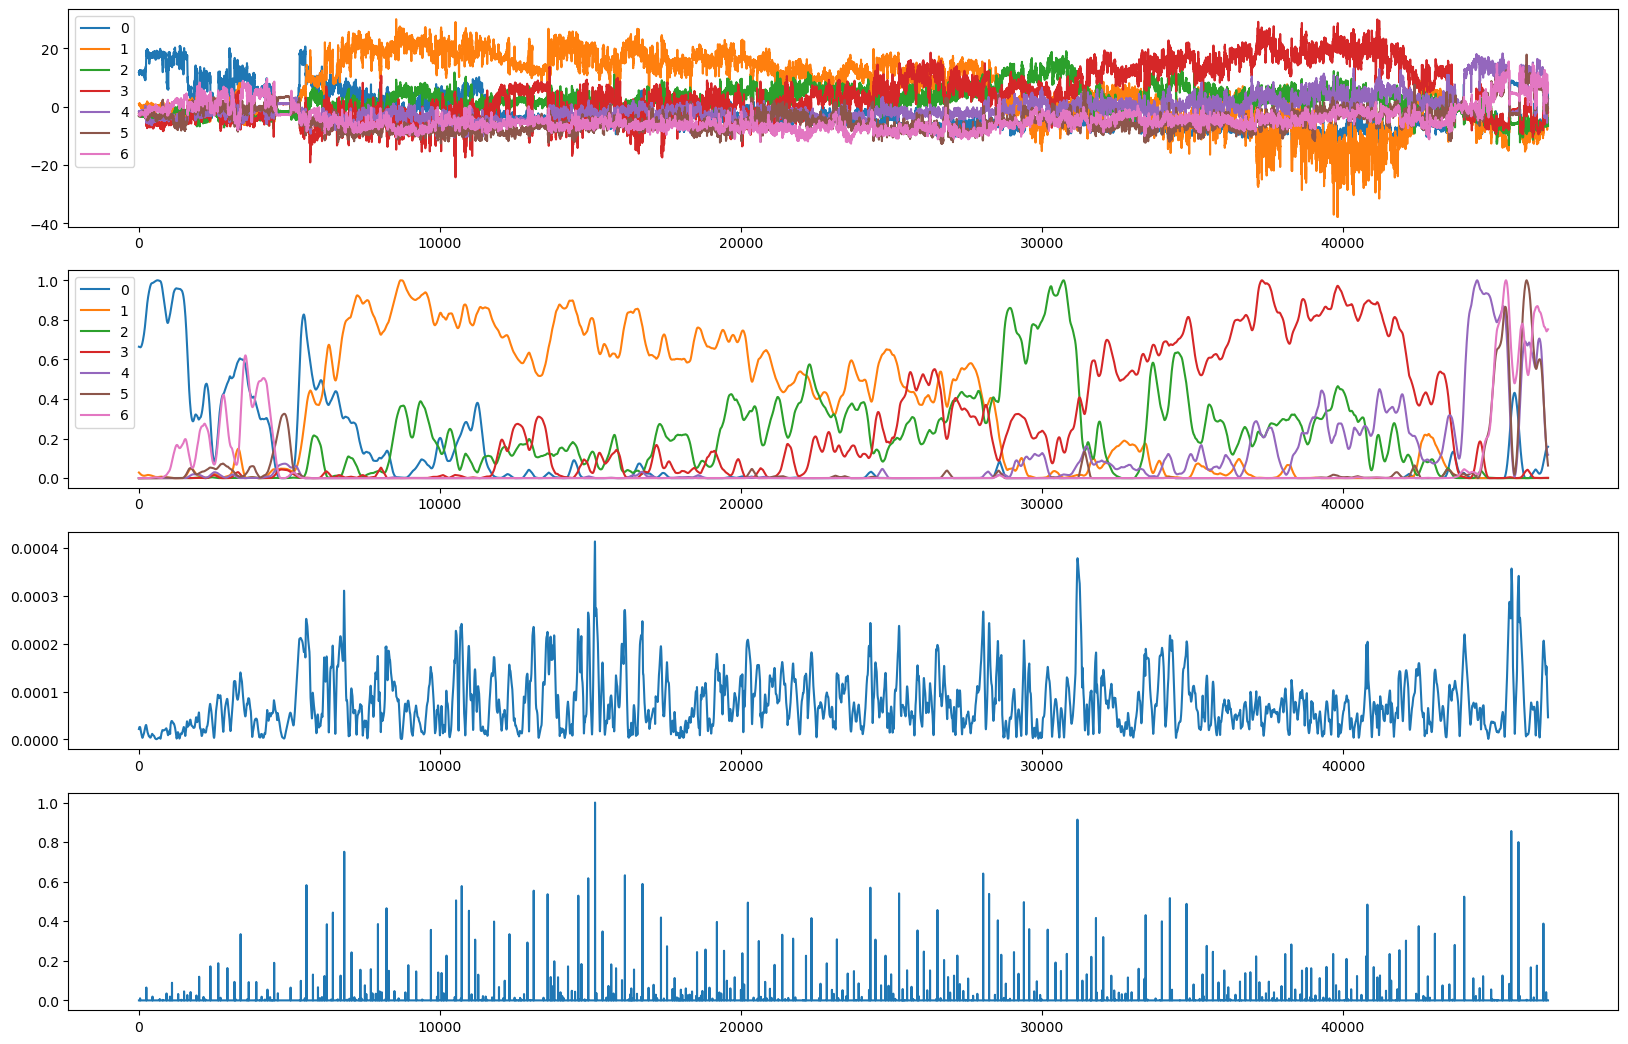

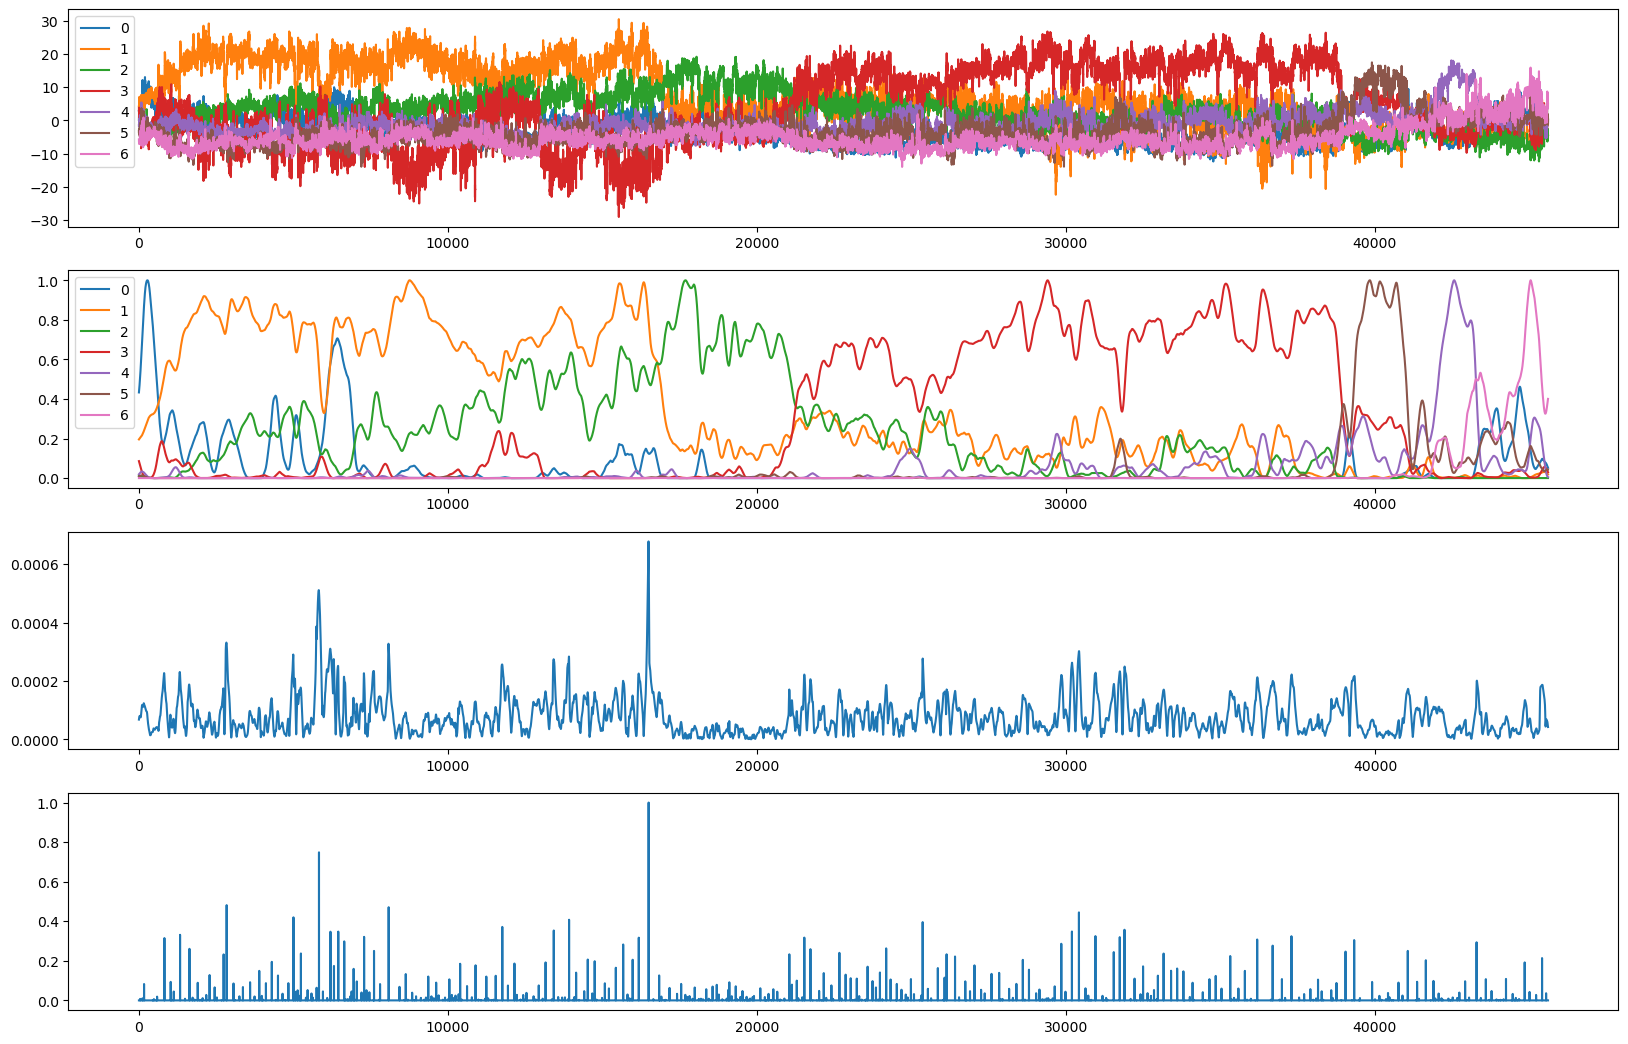

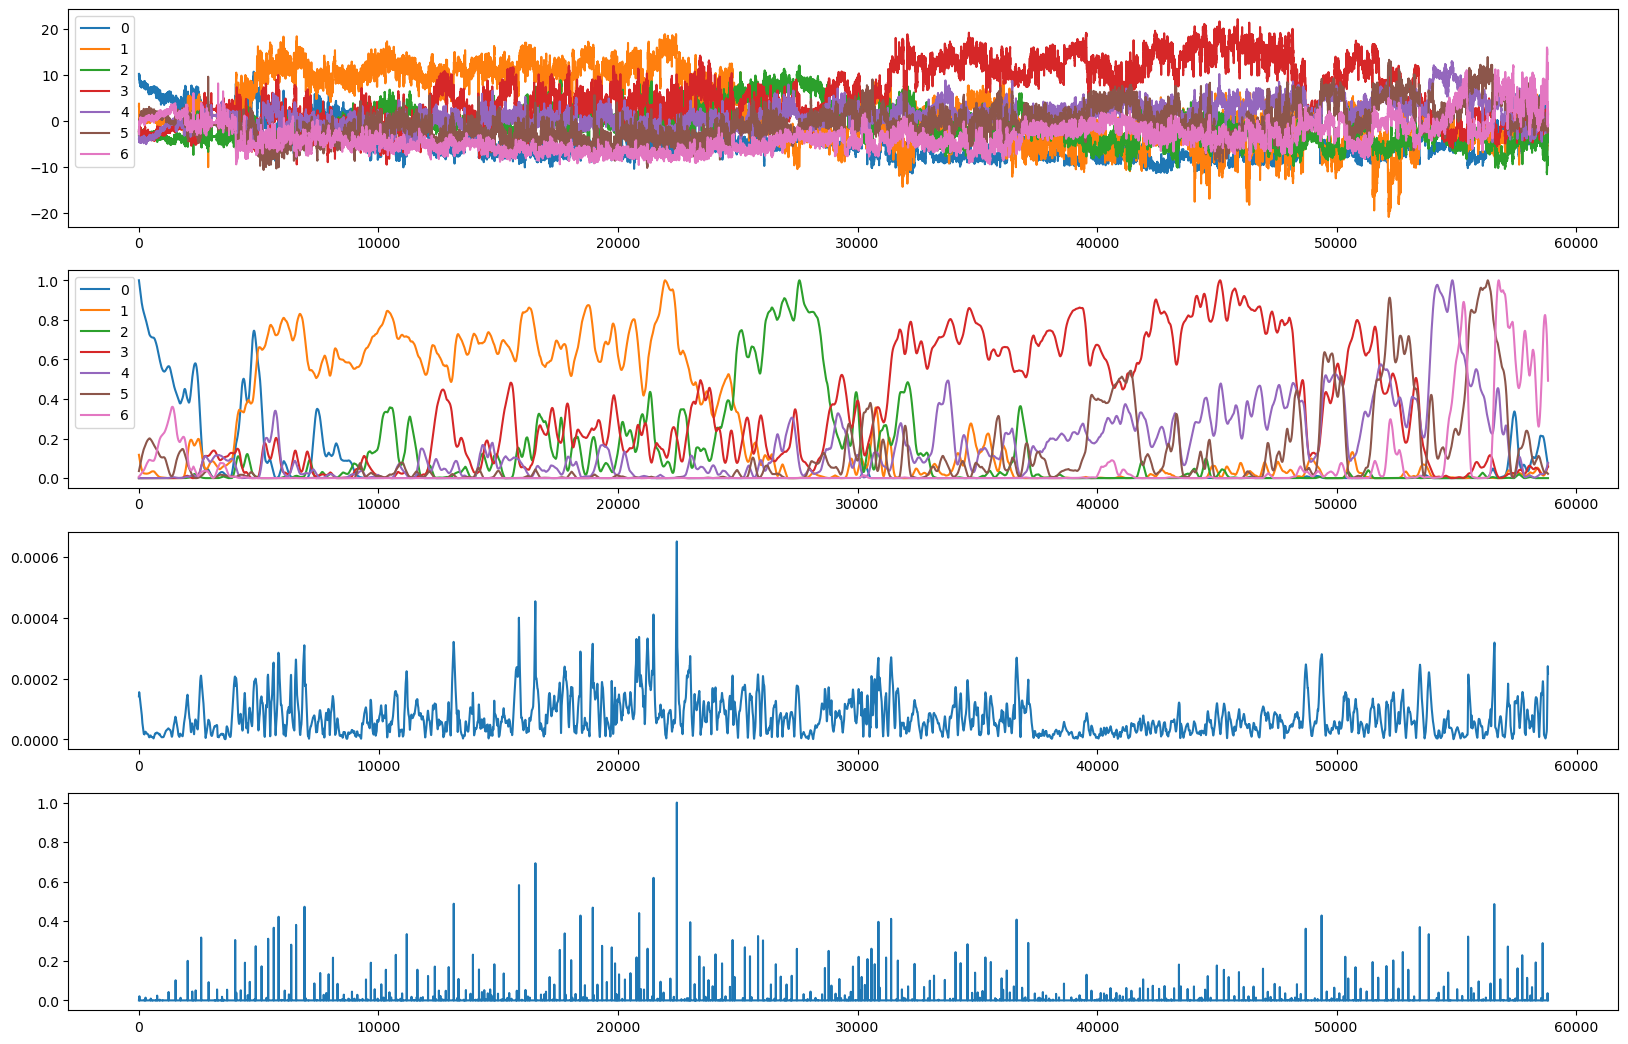

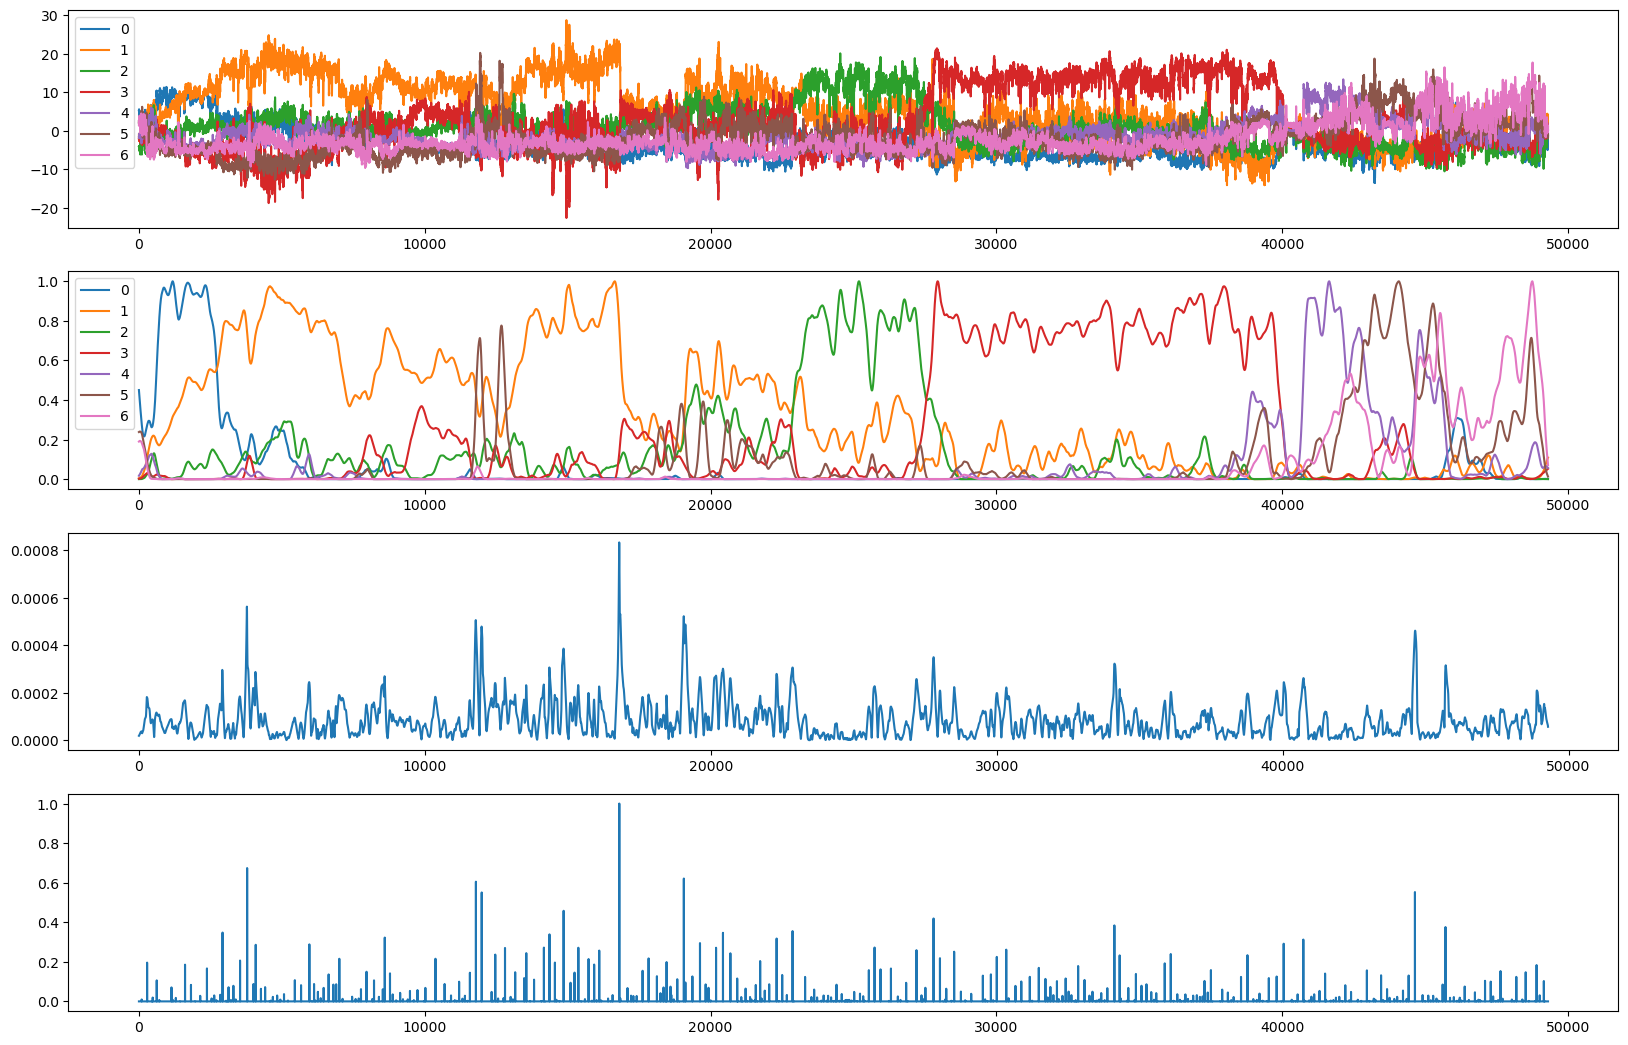

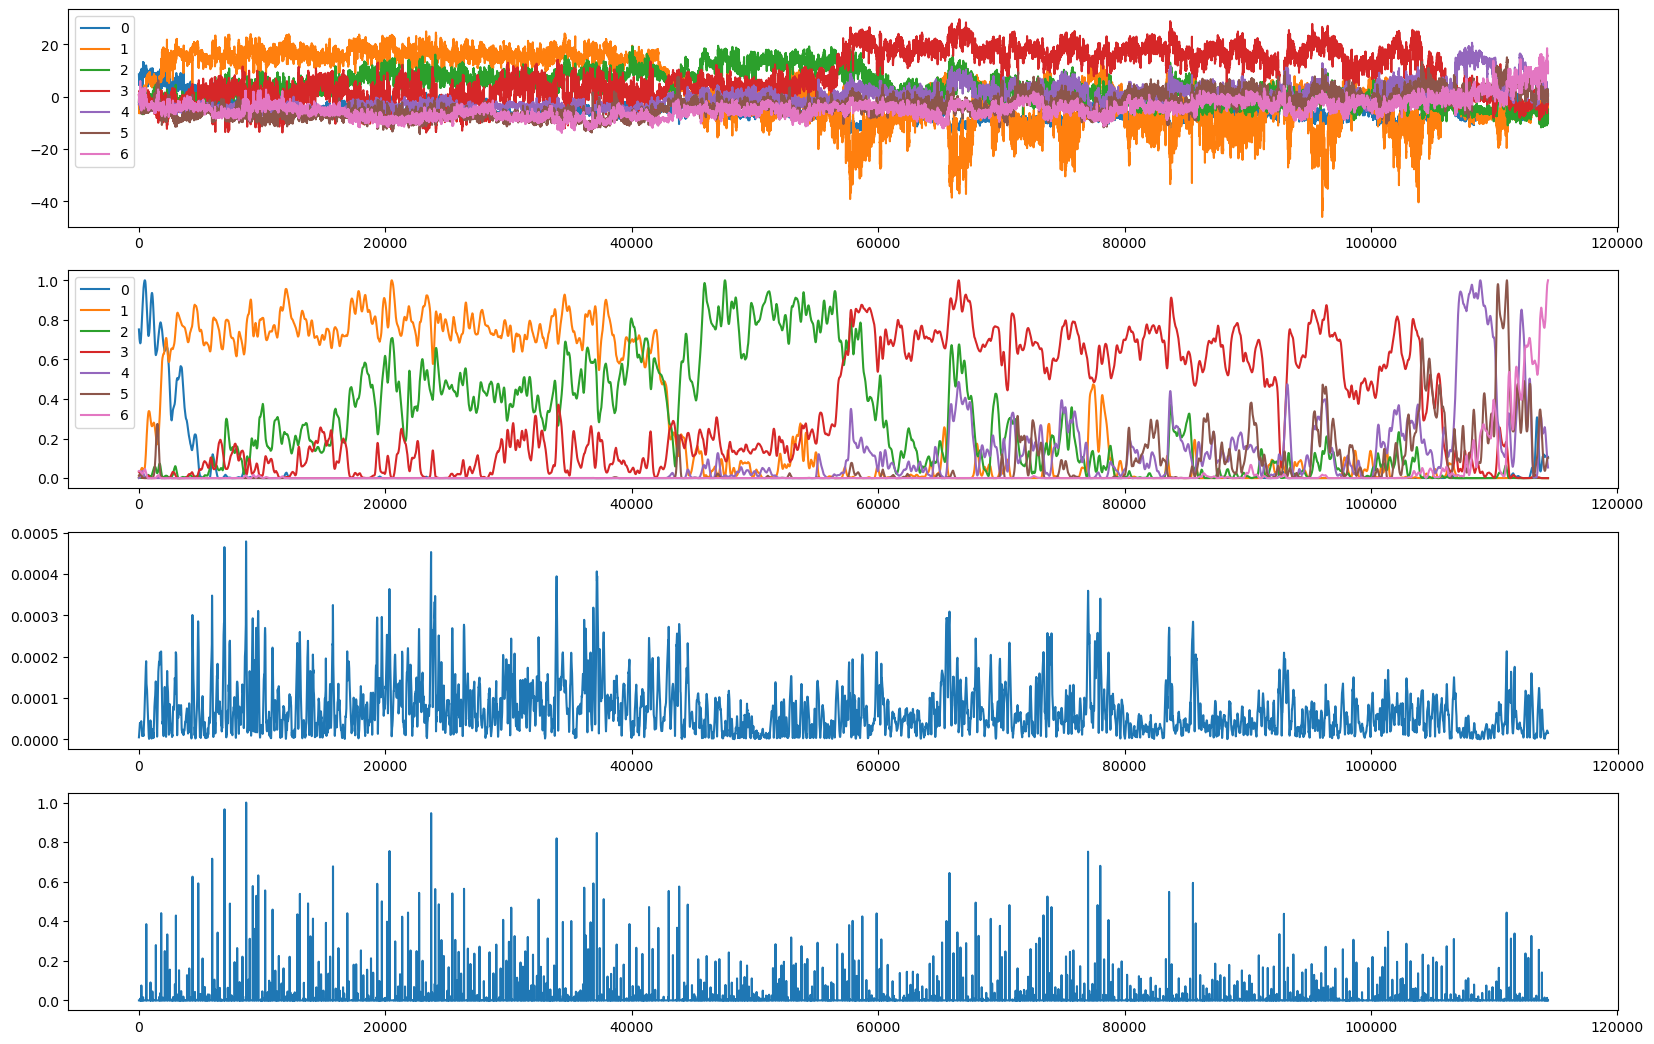

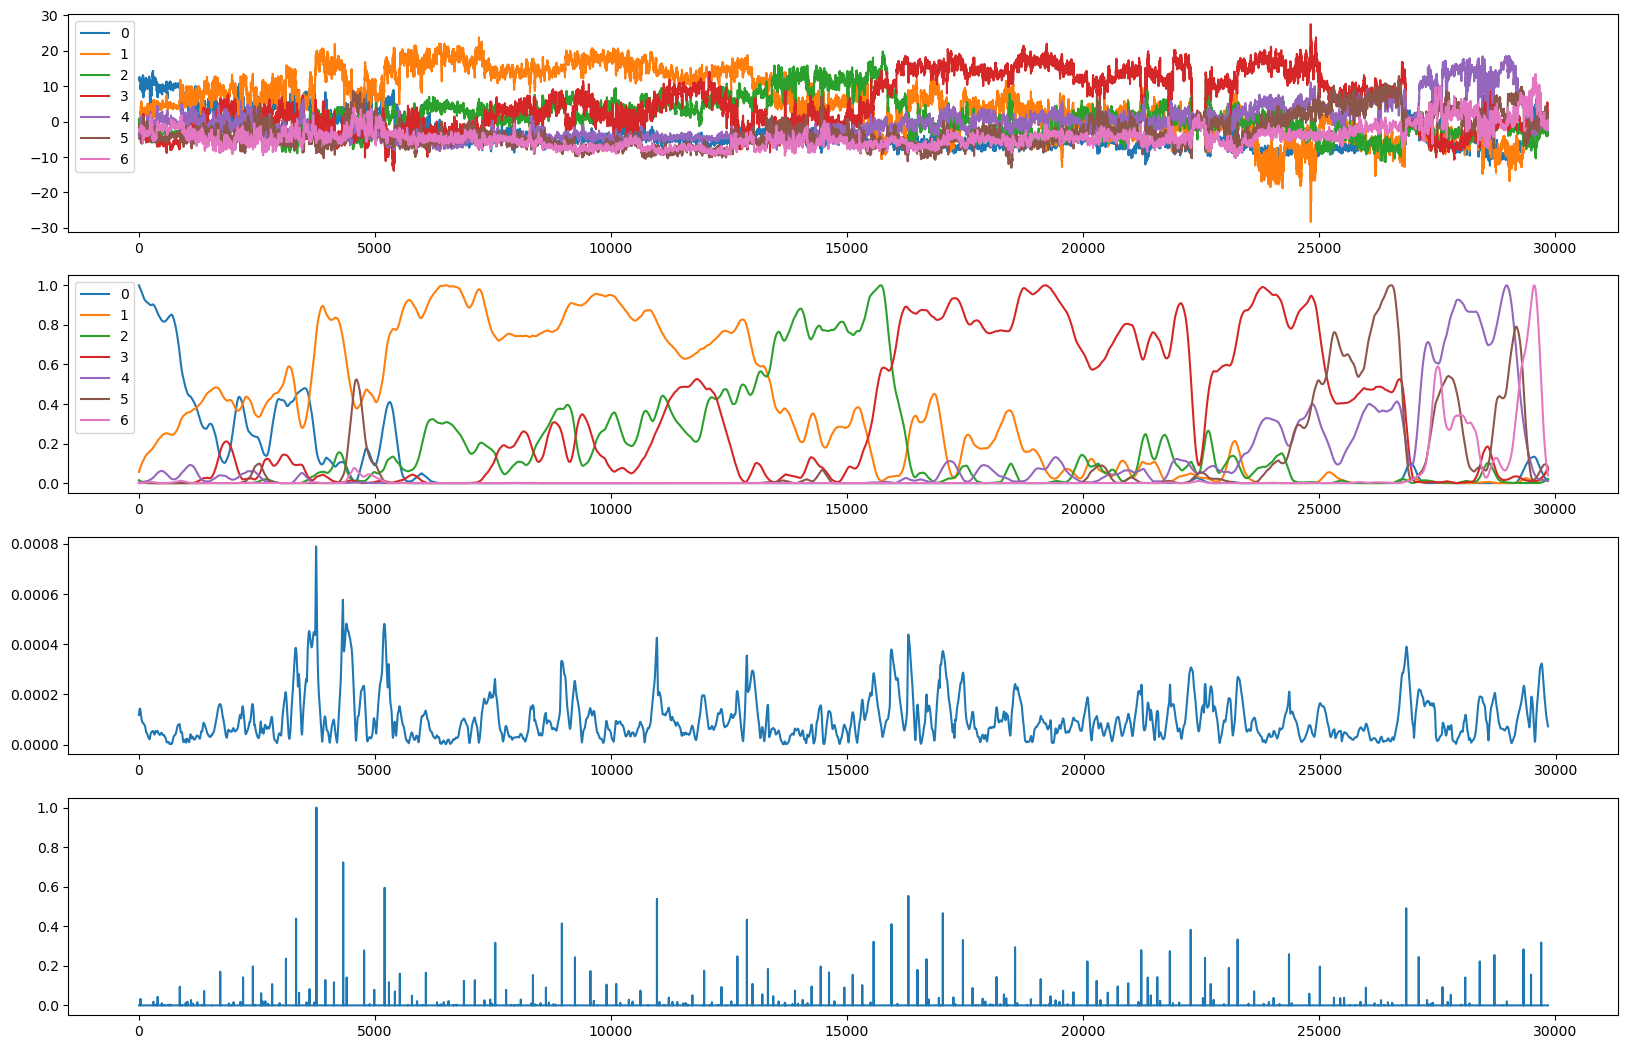

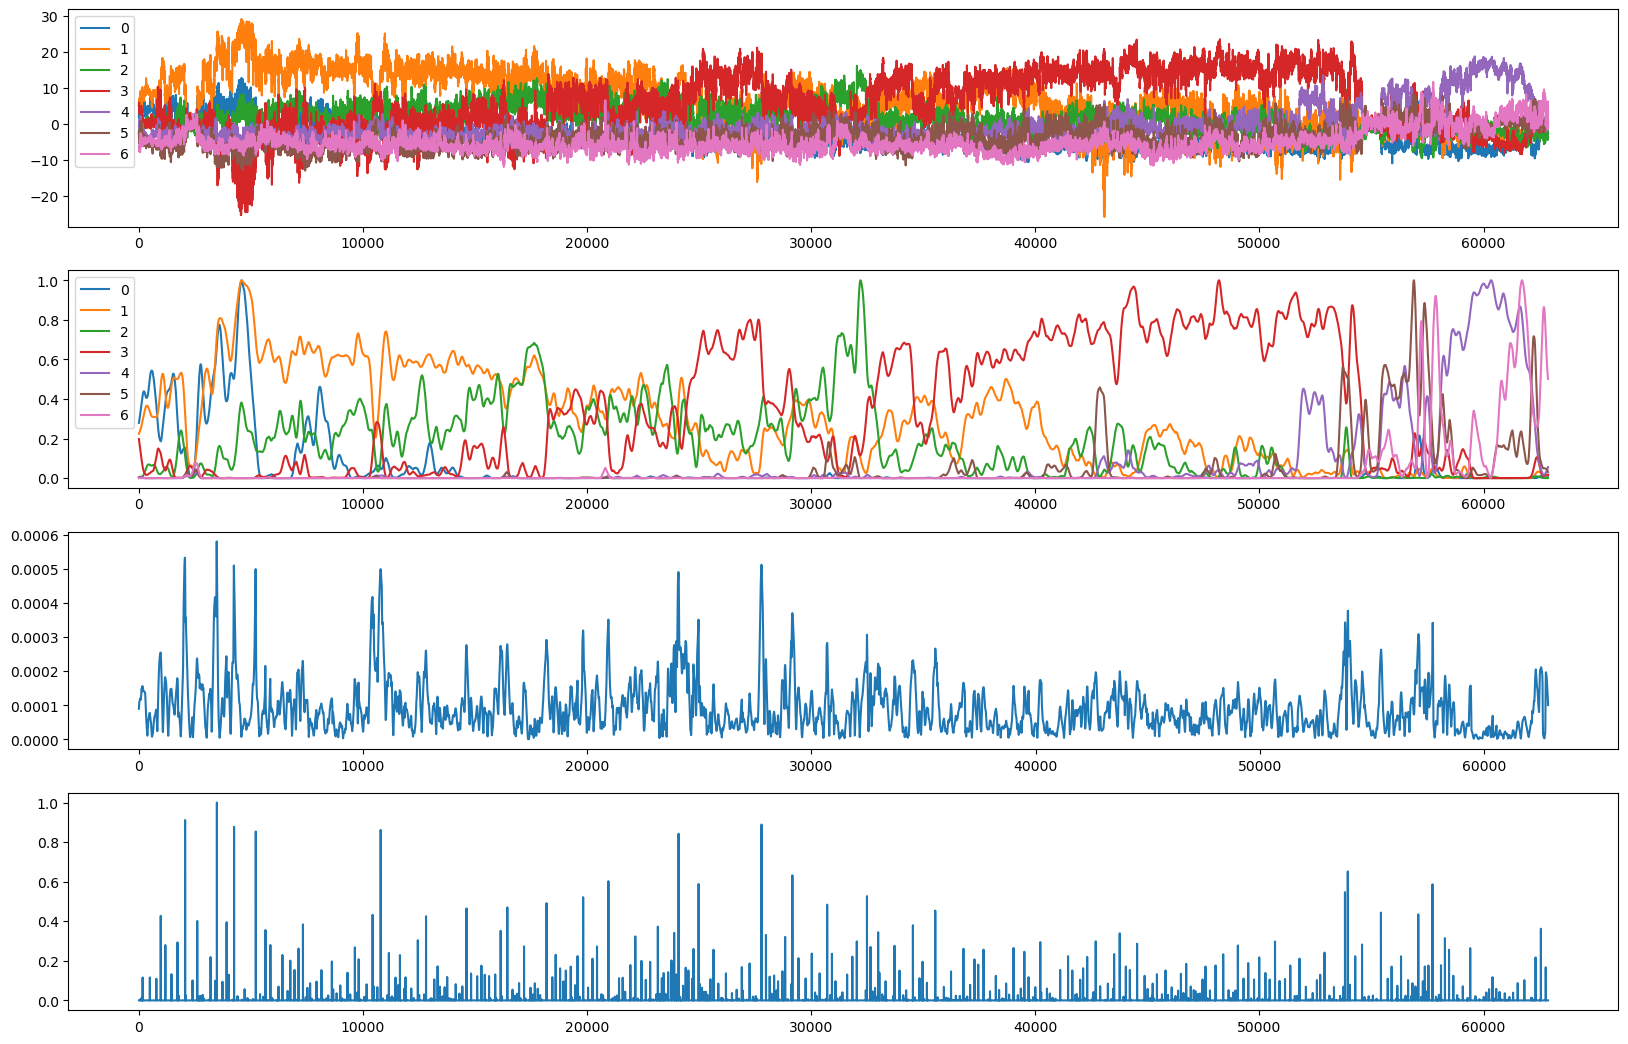

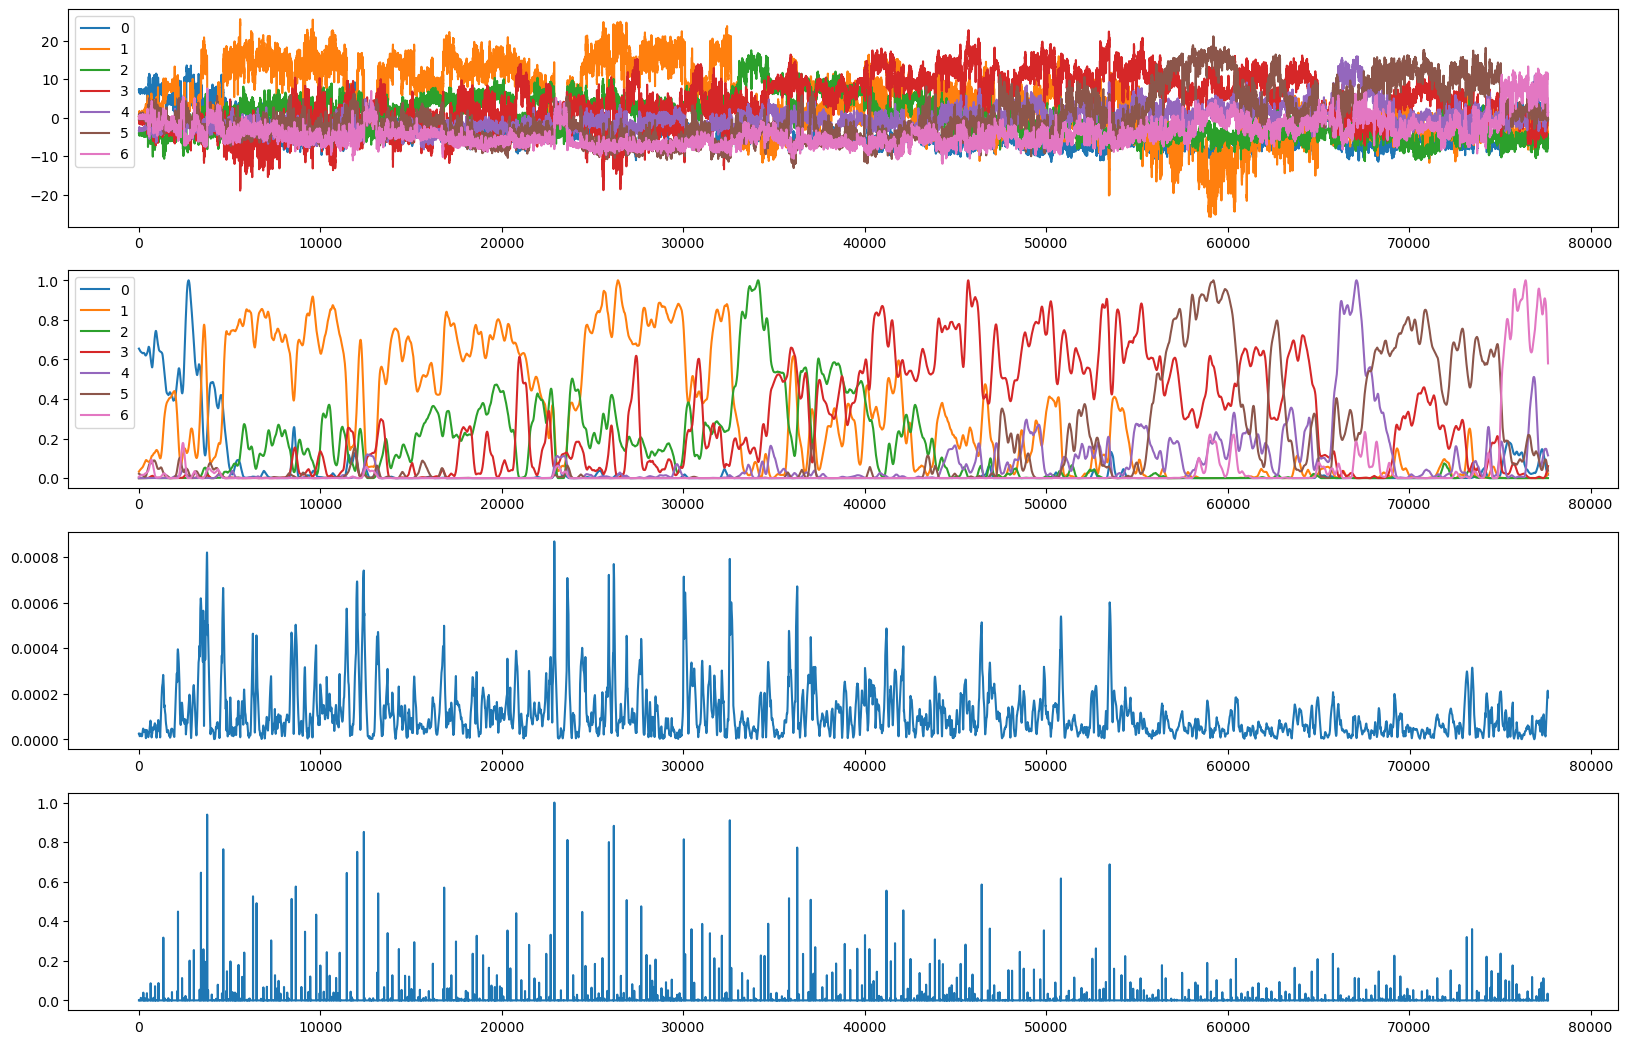

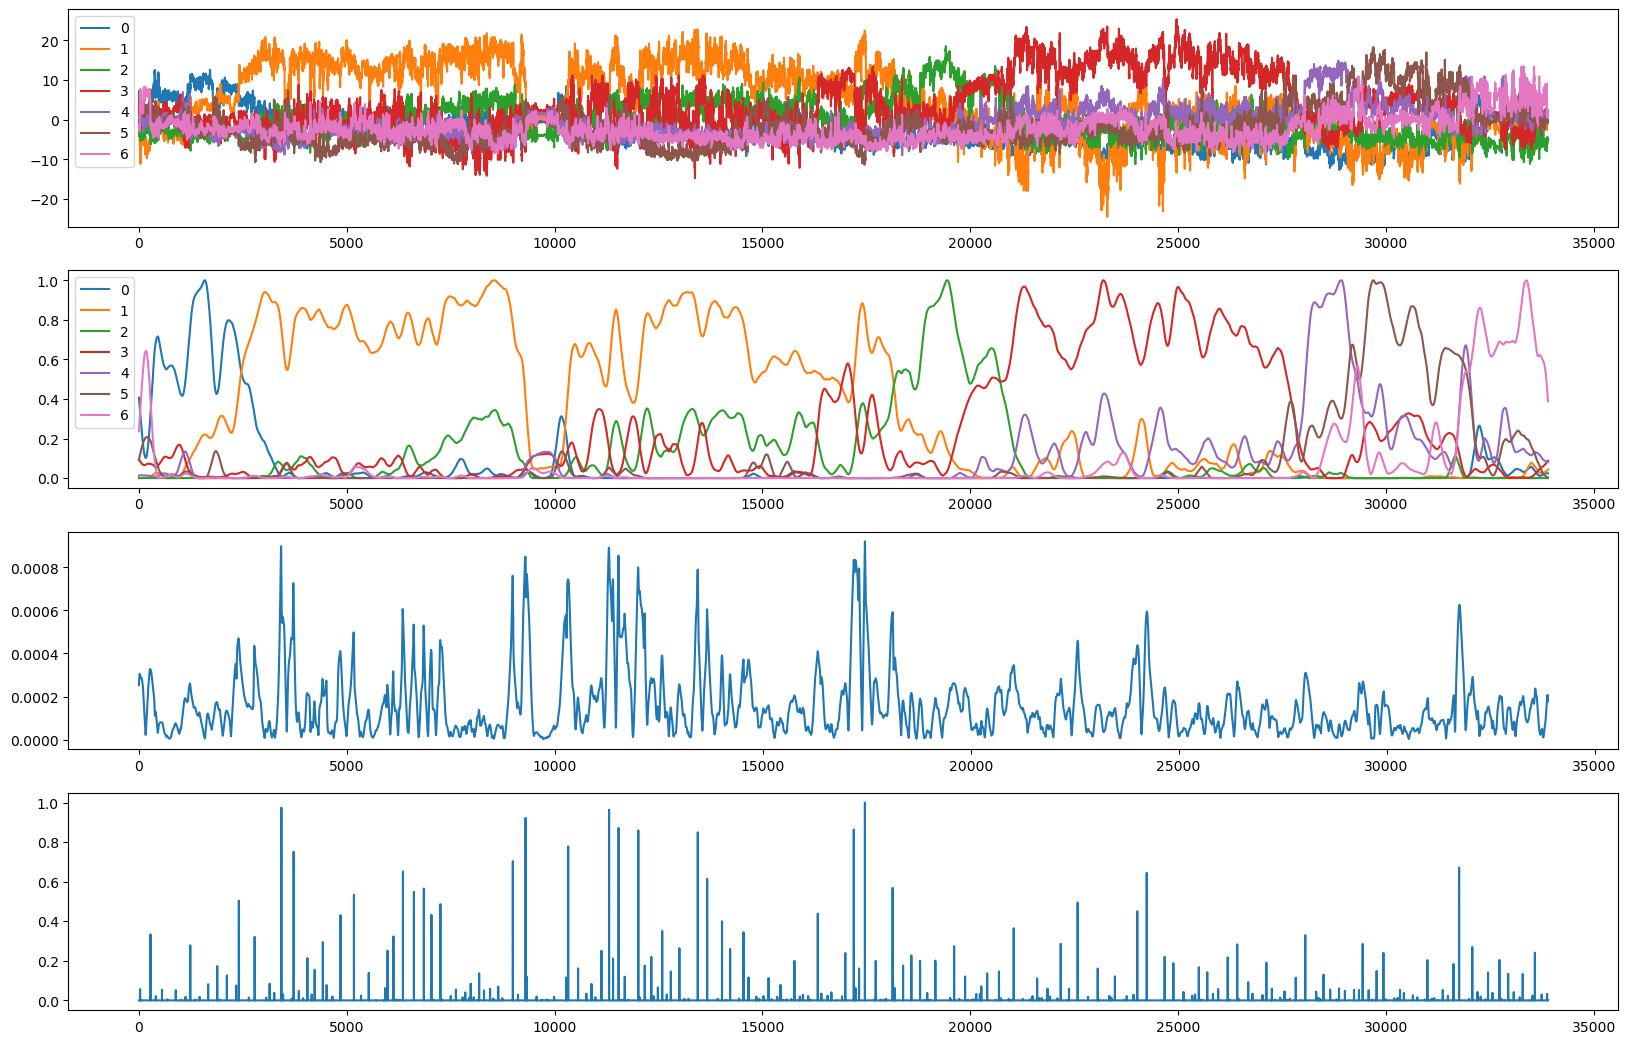

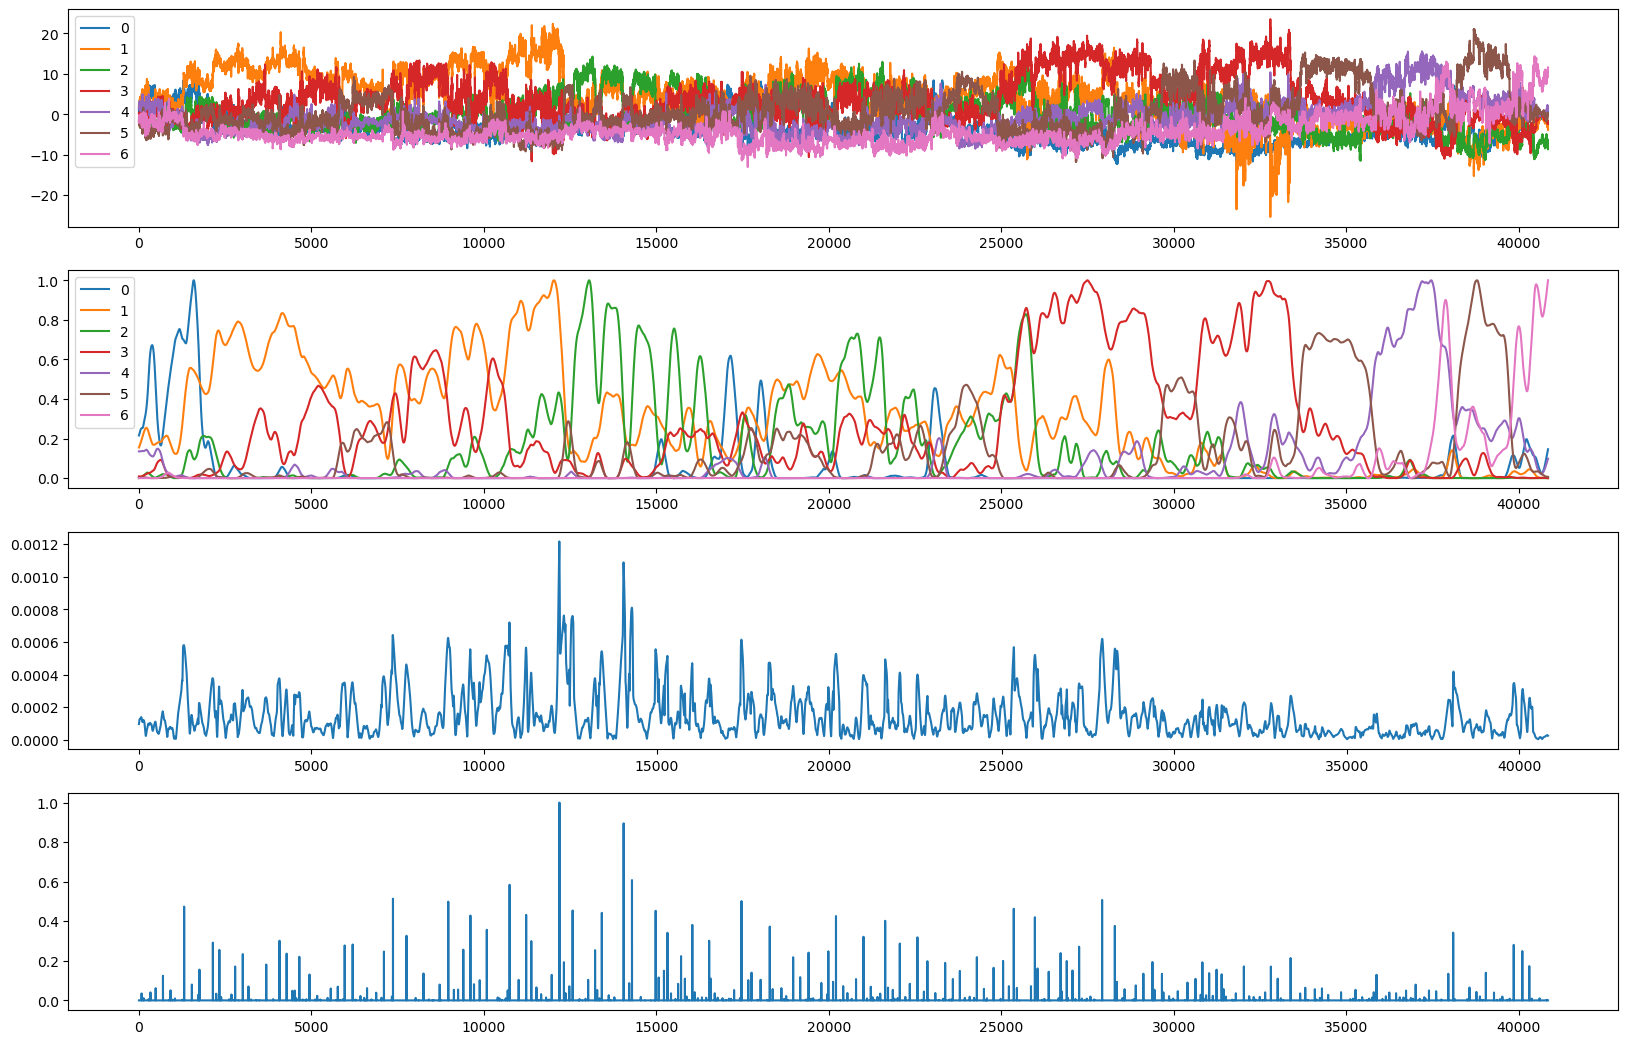

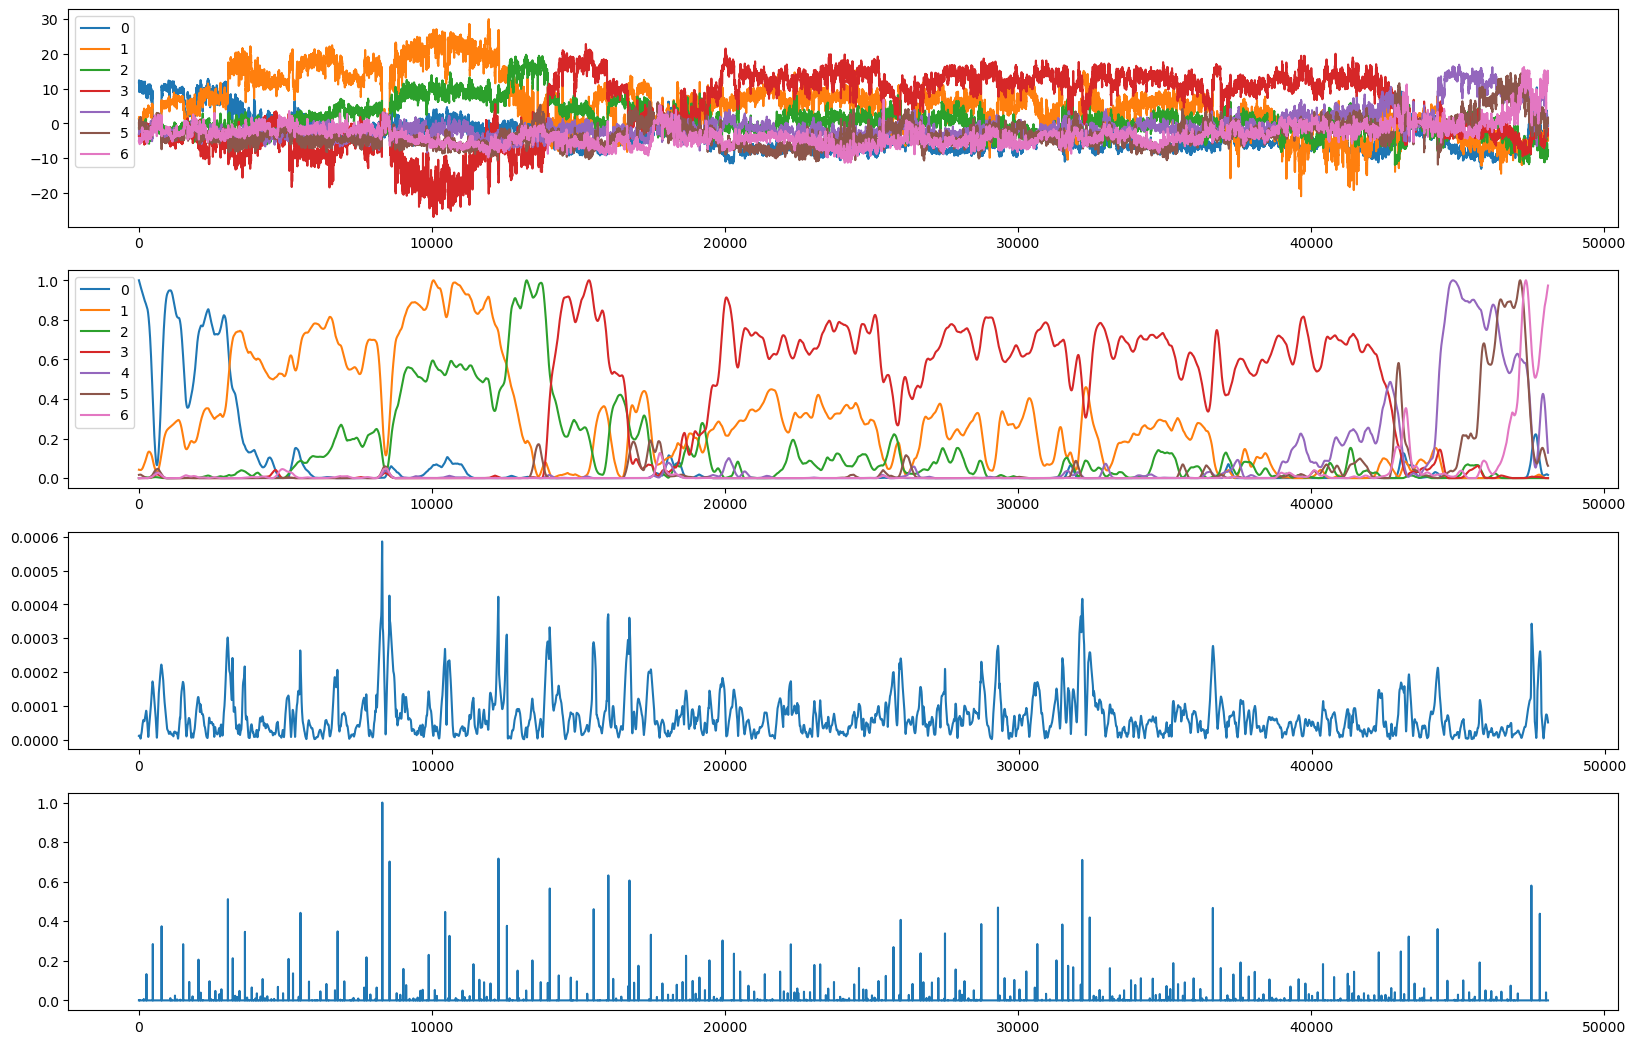

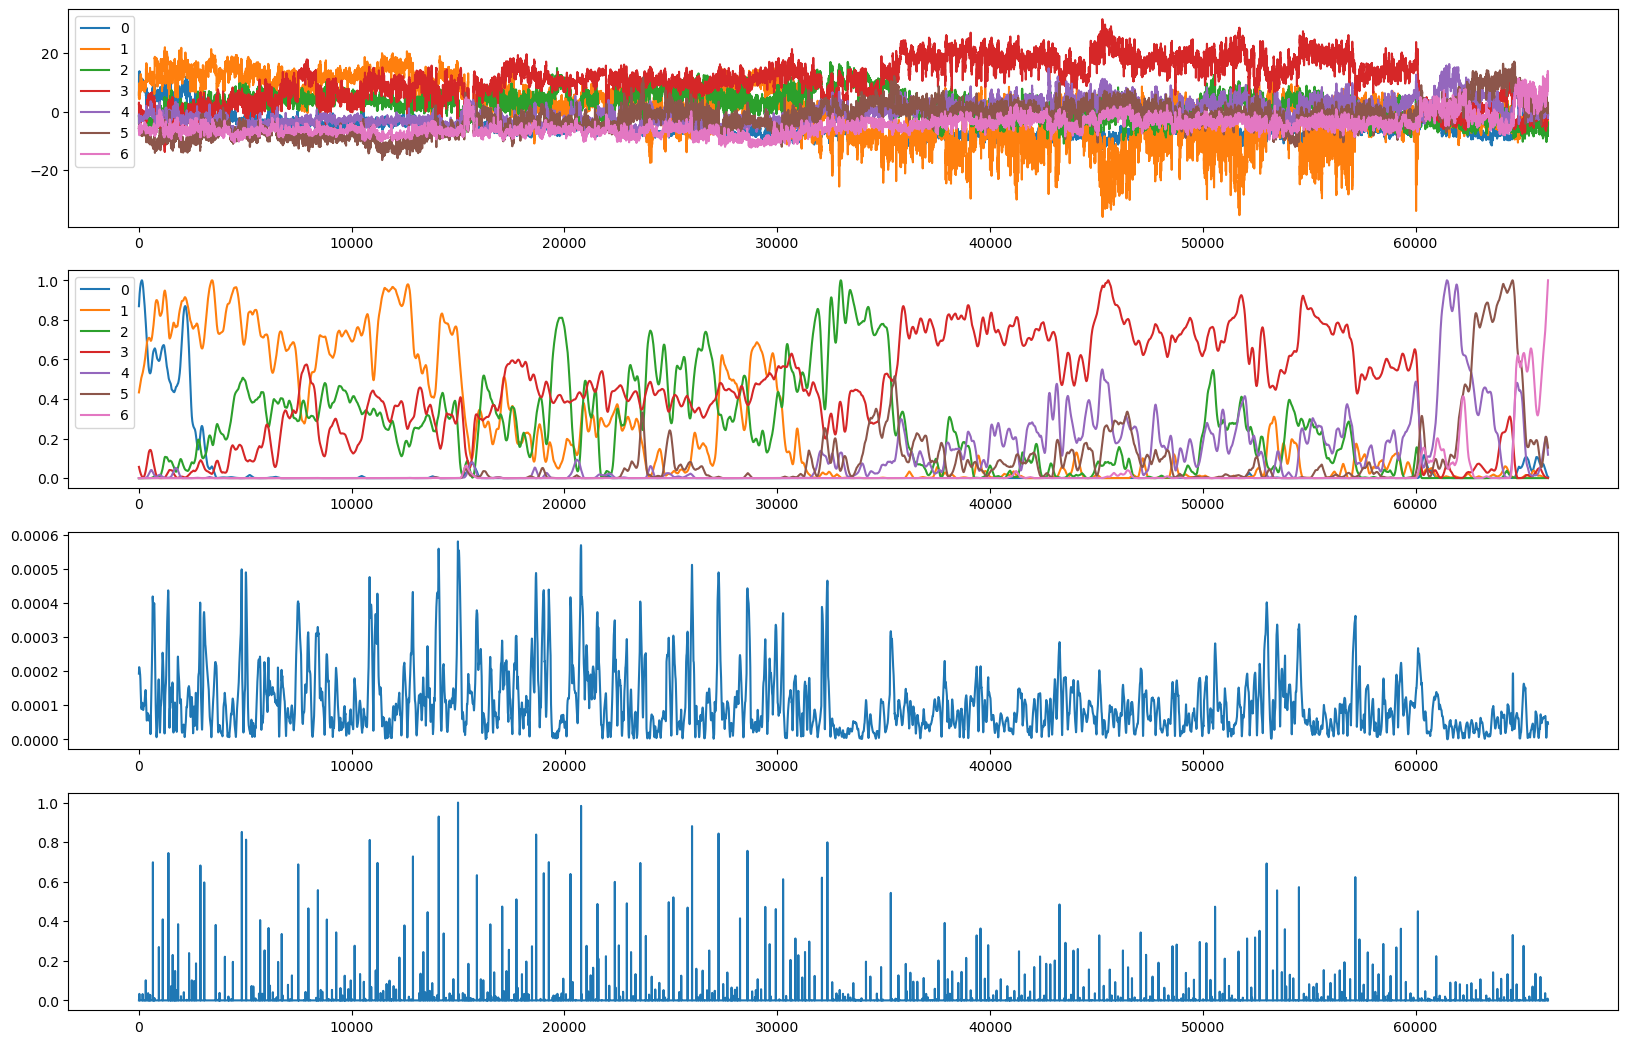

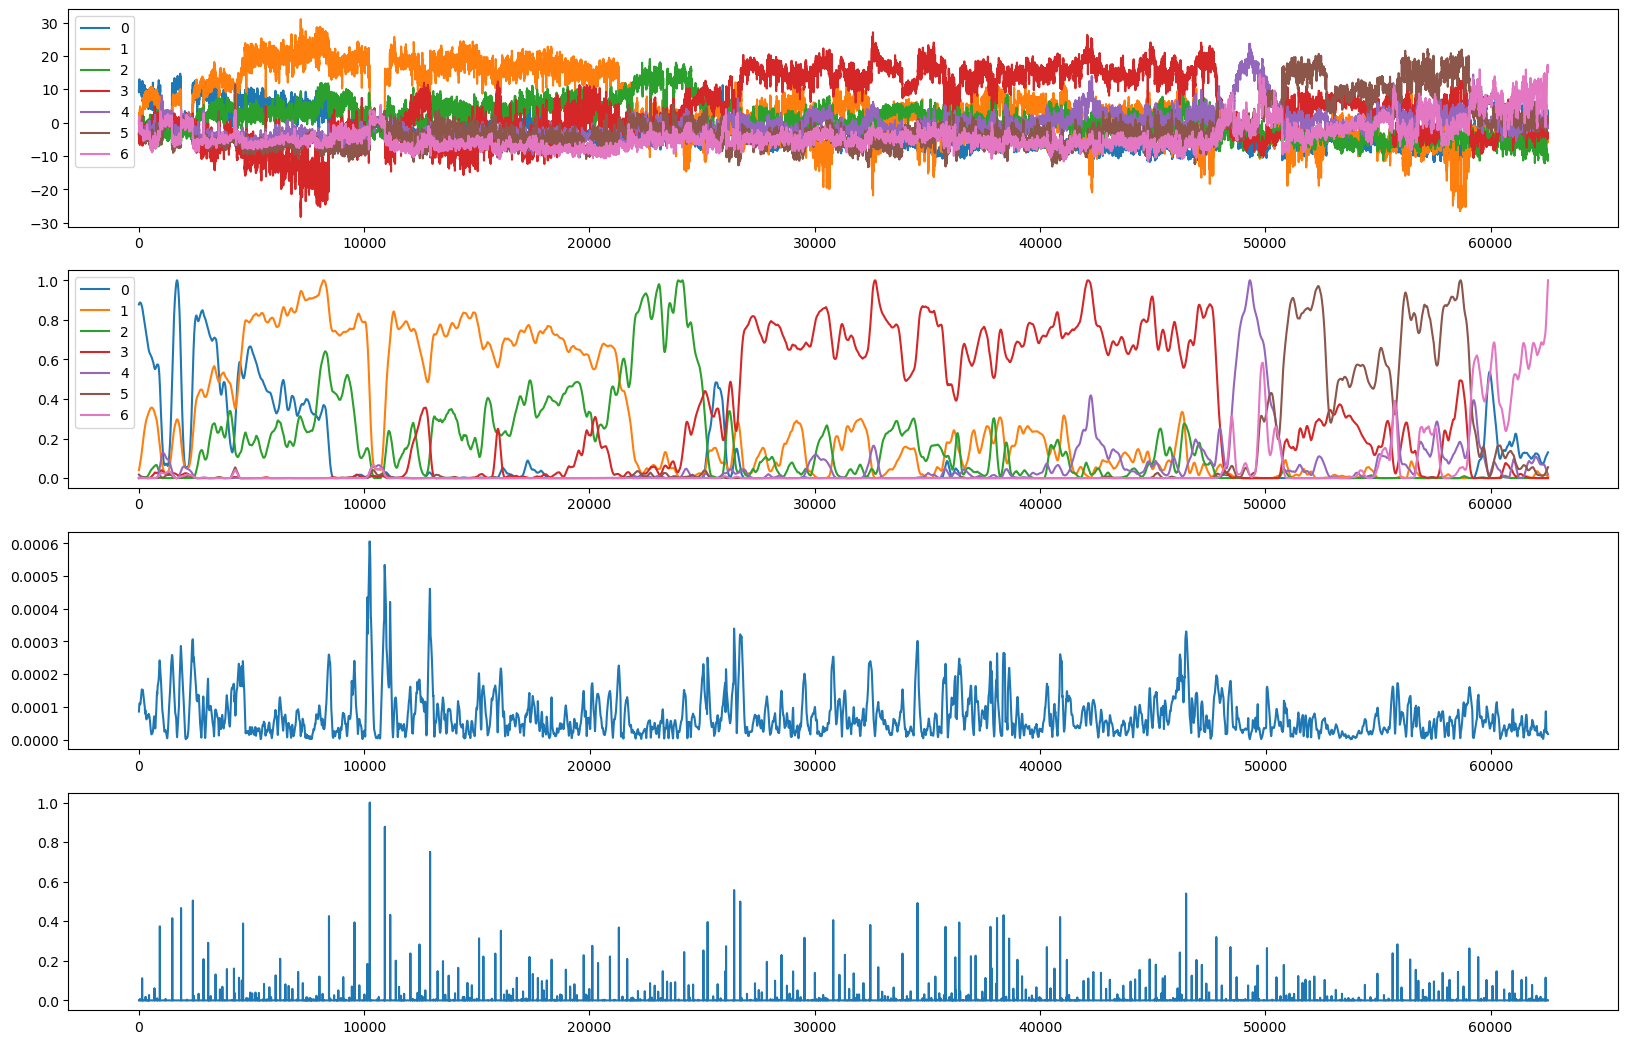

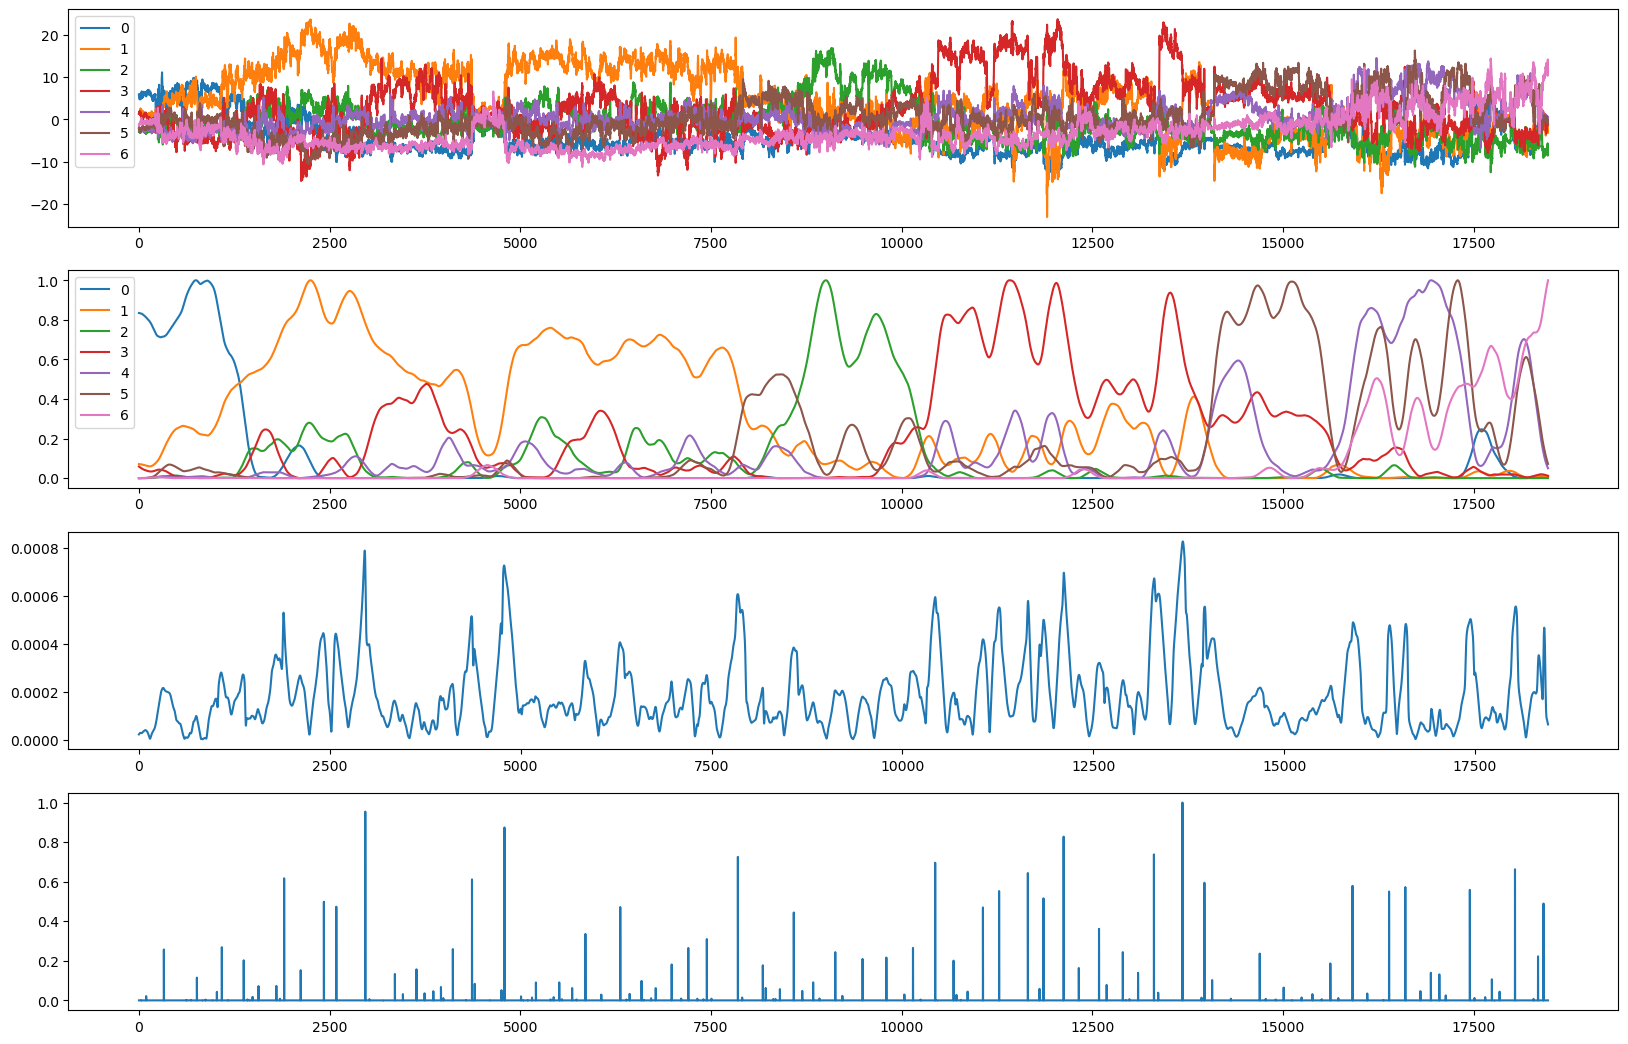

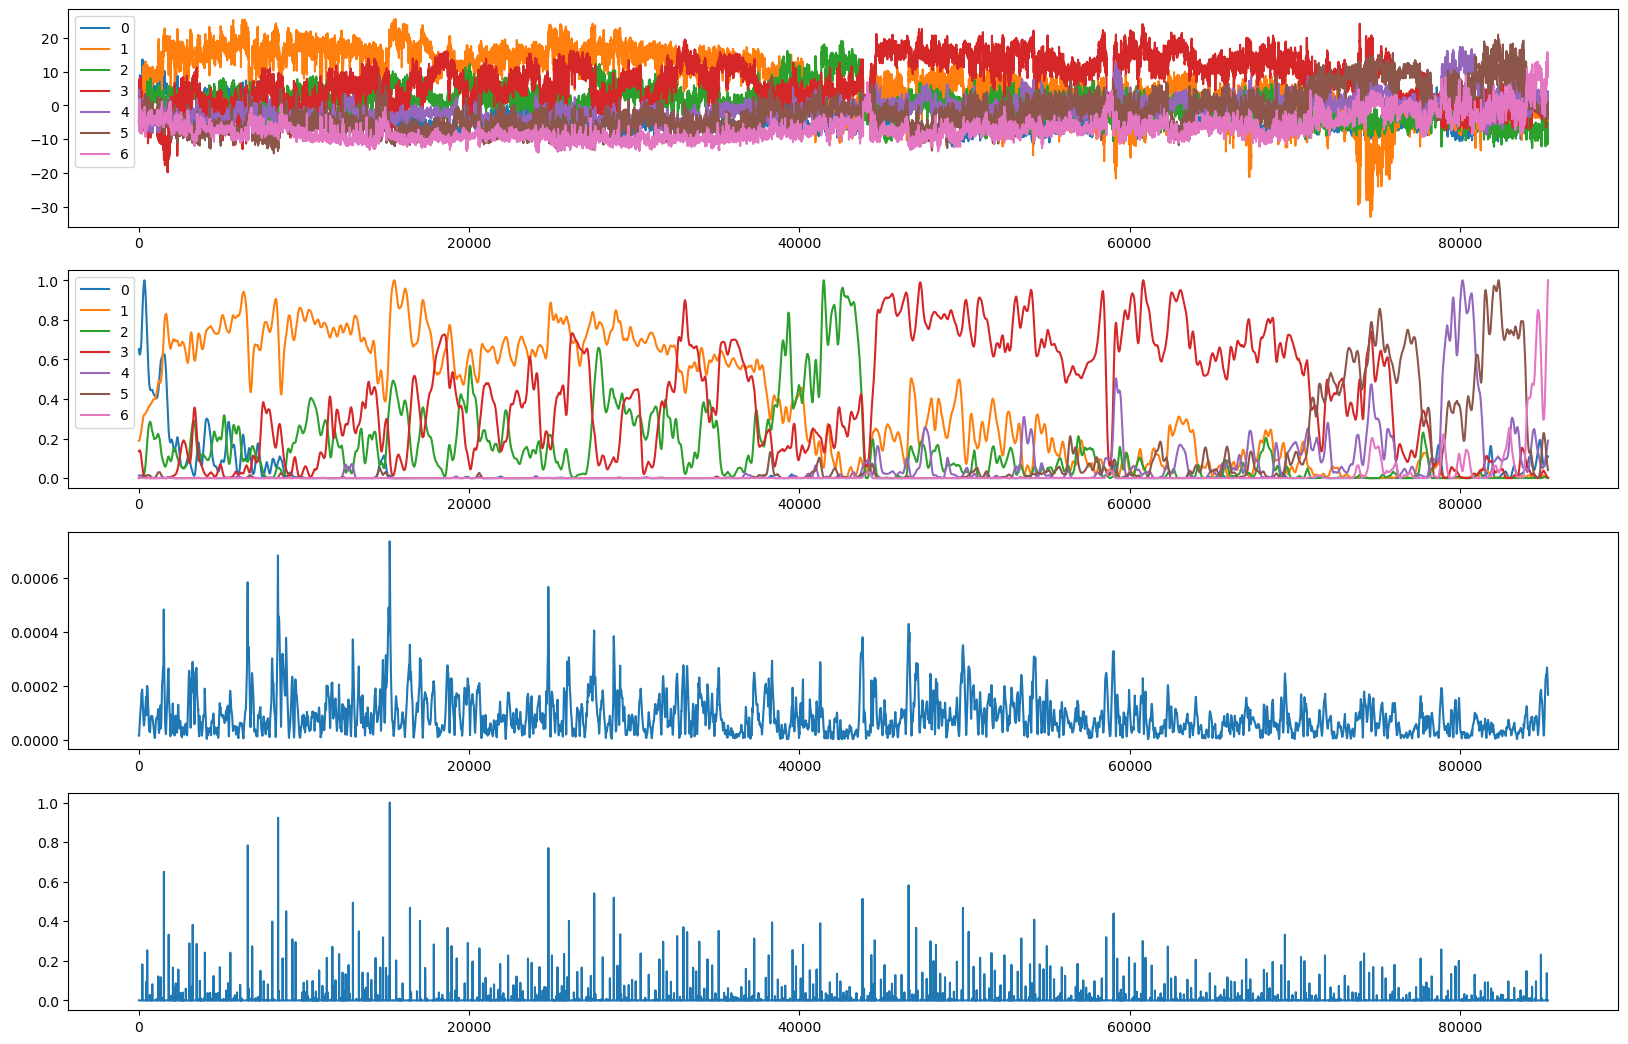

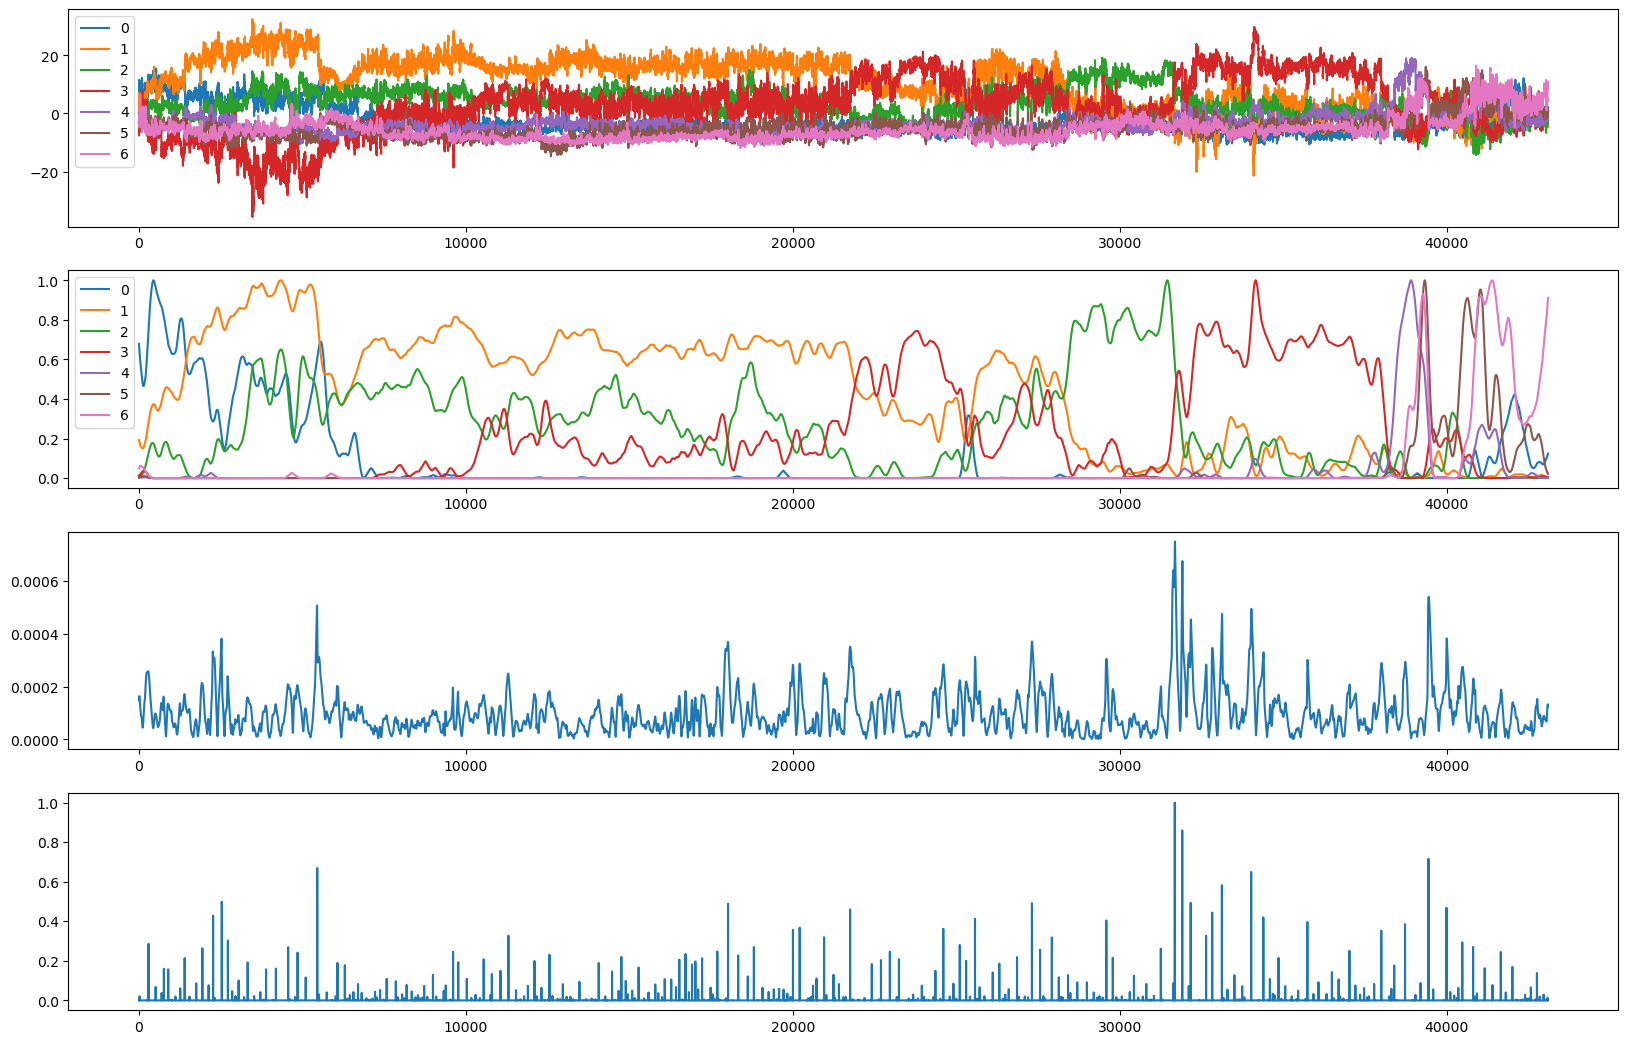

In [7]:
#from TIRE import utils
# main signals
with pd.ExcelWriter(outputs_path+"covvsbws_variable.xlsx") as f:
    #write = csv.writer(f) 
    #write.writerow(row_names) 
    df = pd.DataFrame(columns=txtfilename_list)

    data_line=[]
    data_line2=[]
    data_line3=[]

    start_dx=1000
    initial_offset=0
    
    for idx in range(len(txtfilename_list)):

        input_name=txtfilename_list[idx]
        txtfilename1=txtfile_path+input_name

        #print(txtfilename1)
        pred_file = open(txtfilename1, 'r') 
        pred_Lines = pred_file.readlines()
        ts1=[]
        for i in pred_Lines:
            temp_array=[float(i.split(' ')[2].strip()), float(i.split(' ')[3].strip()), float(i.split(' ')[4].strip()), float(i.split(' ')[5].strip()), float(i.split(' ')[6].strip()), float(i.split(' ')[7].strip()), float(i.split(' ')[8].strip())]
            ts1.append(temp_array)
        ts2=np.array(ts1)
        ts3=np.copy(ts2)
        ts3[ts3<0] = 0
        ts4=np.copy(ts3)
        ts4_filt = utils.matched_filter(ts4, 200)
        for col in range(7):
            minimum=(min(ts4_filt[:,col]))
            ts4_filt[:,col]=ts4_filt[:,col]-minimum
            maximum=(max(ts4_filt[:,col]))
            ts4_filt[:,col]=ts4_filt[:,col]/maximum


        dissimilarities, change_point_scores = model.predict(ts4_filt)
        fig, ax = plt.subplots(4,figsize=(20,13))
        
        ax[0].plot(ts1,label=["0","1","2","3","4","5","6"])
        ax[0].legend(loc='upper left')
        #ax[0].set_title('Time series', size=15)
        #ax[0].set_ylabel(fontsize = 20) # Y label
        #ax[0].set_xlabel(fontsize = 20) # X label
        
        ax[1].plot(ts4_filt,label=["0","1","2","3","4","5","6"])
        ax[1].legend(loc='upper left')
        #ax[1].set_title('Normalized Time series', size=15)
        #ax[1].set_ylabel(fontsize = 20) # Y label
        #ax[1].set_xlabel(fontsize = 20) # X label

        ax[2].plot(dissimilarities)
        #ax[2].set_title('Dissimilarity Curve (D)', size=15)
        #ax[2].set_ylabel(fontsize = 20) # Y label
        #ax[2].set_xlabel(fontsize = 20) # X label
        
        ax[3].plot(change_point_scores)
        #ax[3].set_title('Prominence of Peaks Curve (P)', size=15)
        #ax[3].set_ylabel(fontsize = 20) # Y label
        #ax[3].set_xlabel(fontsize = 20) # X label
        fig.savefig(outputs_path+input_name.split('.')[0], format='svg')
    
        #dissimilarities, change_point_scores = model.predict(ts1)

        cps_len=len(change_point_scores)
        change_point_scores_full=np.copy(change_point_scores[initial_offset:cps_len-initial_offset])

        cov_list=[]
        cov_mean_list=[]
        for dx in range(start_dx,len(change_point_scores_full),5):
            #print(input_name,dx)
            rem=len(change_point_scores_full)%dx
            change_point_scores_new=change_point_scores_full[0:len(change_point_scores_full)-rem]
            cov_mean=[]
            for r in range(0,len(change_point_scores_new),dx):
                arr=change_point_scores_new[r:r+dx]
                cov=variation(arr, axis = 0)
                cov_mean.append(cov)
                cov_list.append(cov)
            cov_mean_list.append(np.mean(cov_mean))
        cov_final=variation(np.array(cov_list), axis = 0)*100
        cov_mean_final=variation(np.array(cov_mean_list), axis = 0)
        prom_count=len(change_point_scores[ np.where( change_point_scores > 0.1 ) ])
        factor2=1-(prom_count/(len(change_point_scores)/200))
        data_line.append(cov_final)
        data_line2.append(factor2*100)
        data_line3.append(cov_final*factor2)
        print(input_name,factor2*20)
        
    df.loc[1]=data_line#*100
    df.loc[2]=data_line2
    df.loc[3]=data_line3
    df.to_excel(f,sheet_name="Window_cov_changepoint_scores")